# 목표

KMRD 데이터 확인 및 기본 통계 분석


In [380]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
# print(matplotlib.__file__)
import subprocess

mpl_file = matplotlib.__file__
mpl_file_loc = '/'.join(mpl_file.split('/')[:-1]) + '/mpl-data/fonts/ttf/'

# 폰트 복사

subprocess.run(f'cp /usr/share/fonts/truetype/nanum/Nanum* {mpl_file_loc}', shell=True)
print(mpl_file_loc)
subprocess.run('rm -rf ~/.cache/matplotlib/*', shell=True)
plt.rcParams["font.family"] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지
# 커널 재시작

/home/innovation/codessey/venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/


In [381]:
class MovieDataLoader:
    def __init__(self, file_path = '../data'):
        self.file_path = file_path
        self.__load_data()

    def __load_data(self):
        for file_name in os.listdir(self.file_path):
            self.file_name = []
            if file_name.endswith('.csv'):
                setattr(self, os.path.splitext(file_name)[0], pd.read_csv(os.path.join(self.file_path, file_name)))
            if file_name.endswith('.txt'):
                setattr(self, os.path.splitext(file_name)[0], pd.read_csv(os.path.join(self.file_path, file_name), sep='\t', engine='python'))



In [382]:
movie_data_loader = MovieDataLoader()
casting = movie_data_loader.castings
countries = movie_data_loader.countries
genres = movie_data_loader.genres
movies = movie_data_loader.movies
peoples = movie_data_loader.peoples
rates = movie_data_loader.rates

# 결측치(Missing Value)

결측치(Missing Value)는 데이터 분석에서 값이 누락된 상태를 의미하며, 설문조사나 실험 데이터에서 특정 변수의 값이 기록되지 않은 경우를 포함합니다. 결측치는 데이터 분석 및 모델링 과정에서 중요한 전처리 과제로, 잘못 처리할 경우 분석 결과에 편향을 초래하거나 신뢰성을 떨어뜨릴 수 있습니다.

## 결측치의 종류
1. **완전 무작위 결측 (MCAR)**: 결측치가 다른 변수와 무관하게 무작위로 발생.
2. **무작위 결측 (MAR)**: 결측치가 다른 변수와 관련이 있지만, 해당 변수의 값과는 무관.
3. **비무작위 결측 (MNAR)**: 결측치가 특정 변수의 값이나 패턴과 관련.

## 결측치 처리 방법
1. **삭제**:
   - **Listwise Deletion**: 결측치가 있는 행 전체 삭제.
   - **Pairwise Deletion**: 분석에 필요한 변수들만 기준으로 삭제.
   - 장점: 간단하지만 데이터 손실 가능성.
   
2. **대치(Imputation)**:
   - 평균(mean), 중앙값(median), 최빈값(mode) 대치.
   - 회귀분석, KNN, 머신러닝 모델 기반 대치.
   
3. **예측 모델 사용**:
   - 결측치를 예측하여 채우는 방식으로, 복잡하지만 정확도 향상 가능.

4. **결측 비율에 따른 처리**:
   - 10% 미만: 삭제 또는 간단한 대치.
   - 10~20%: 모델 기반 대치.
   - 20% 이상: 고급 모델 사용 또는 변수 제거 고려.

## 결측치를 처리해야 하는 이유
- 데이터 분석의 신뢰성 확보.
- 산술 연산 오류 방지.
- 편향(bias) 최소화. 

결론적으로, 결측치는 데이터 분석에서 흔히 발생하며, 적절한 탐지와 처리를 통해 분석 결과의 품질을 유지하는 것이 중요합니다.



In [383]:
# How many missing values are in the data?

## casting
print(casting.isnull().sum())

## countries
print(countries.isnull().sum())

## genres
print(genres.isnull().sum())

## rates
print(rates.isnull().sum())


movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64


## 이상치(Outlier)에 대한 조사

### **1. 이상치의 정의**
이상치는 데이터 집합에서 다른 데이터들과 현저히 차이가 나는 관측값을 의미합니다. 이러한 값은 데이터의 일반적인 패턴과 일치하지 않으며, 통계적 분석이나 모델링 과정에서 중요한 영향을 미칠 수 있습니다. 이상치는 데이터 입력 오류, 측정 오류, 혹은 실제로 특이한 현상을 반영하는 경우에 발생할 수 있습니다.

---

### **2. 이상치 탐지의 중요성**
- **데이터 품질 향상**: 이상치를 제거하거나 처리하면 데이터의 신뢰성을 높일 수 있습니다.
- **모델 성능 개선**: 이상치는 분석 모델의 결과를 왜곡할 수 있으므로 이를 탐지하고 처리하면 모델의 예측 정확도를 높일 수 있습니다.
- **부정 행위 탐지**: 금융, 보안 등 다양한 분야에서 이상치를 통해 부정 행위를 발견할 수 있습니다.

---

### **3. 이상치 탐지 방법**
#### **(1) 통계적 방법**
- **Z-Score**: 데이터가 평균으로부터 얼마나 떨어져 있는지를 표준편차 단위로 나타냅니다. 일반적으로 \( |Z| > 3 \)인 데이터를 이상치로 간주합니다.
- **IQR(Interquartile Range)**: 사분위수를 이용해 이상치를 탐지하며, \( Q1 - 1.5 \times IQR \) 이하 또는 \( Q3 + 1.5 \times IQR \) 이상의 값을 이상치로 판단합니다.

#### **(2) 머신러닝 기반 방법**
- **k-NN (k-Nearest Neighbors)**: 데이터 포인트와 가장 가까운 이웃 간의 거리를 기반으로 이상치를 탐지합니다[5].
- **앙상블 기법**: 여러 개의 탐지 모델을 결합하여 성능을 향상시키는 방법입니다[6].

#### **(3) 도메인 특화 방법**
특정 도메인에 맞춘 탐지 방법을 사용합니다. 예를 들어:
- 금융 거래에서는 거래 패턴과 입력 패턴을 분석하여 비정상 거래를 탐지합니다
- 인터넷 전화 서비스에서는 과금 우회 공격을 탐지하기 위해 히스토리 데이터를 활용합니다

---

### **4. 이상치 처리 방법**
- **제거**: 이상치를 완전히 제거하여 분석에 포함하지 않습니다.
- **대체**: 평균값, 중앙값 등으로 대체하여 분석에 포함합니다.
- **모델링**: 이상치를 포함한 상태에서 적절한 모델을 사용해 분석합니다.

---


### **6. 한계와 고려사항**
- **오탐률(FP)**: 정상 데이터를 잘못된 이상치로 분류할 가능성이 존재합니다.
- **도메인 지식 필요성**: 효과적인 탐지를 위해서는 도메인 지식이 필수적입니다.
- **데이터 불균형 문제**: 이상치는 일반적으로 드물게 나타나므로 불균형 데이터 문제를 고려해야 합니다.

---

### **7. 결론**
이상치는 데이터 분석 및 모델링 과정에서 중요한 요소로 작용하며, 이를 적절히 탐지하고 처리하는 것은 데이터 품질과 분석 결과의 신뢰성을 높이는 데 필수적입니다. 다양한 통계적, 기계학습적 기법을 활용하여 도메인에 맞는 최적의 접근 방식을 선택하는 것이 중요합니다.


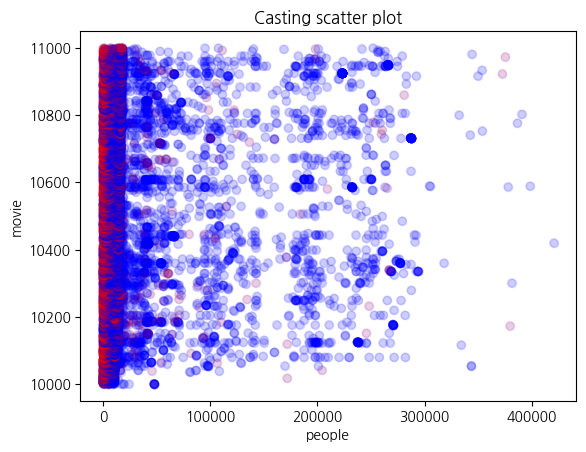

<Axes: title={'center': 'People distribution'}, xlabel='people', ylabel='count'>

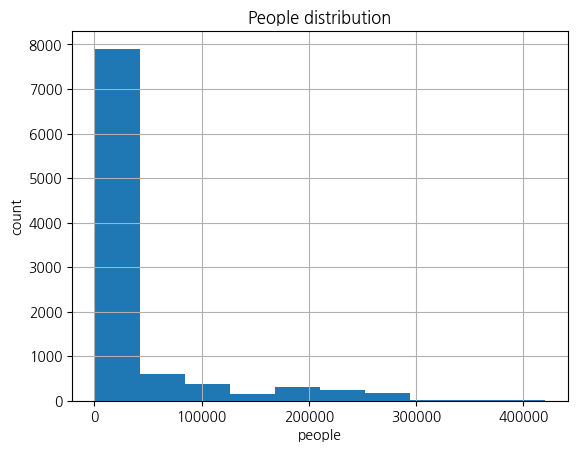

In [384]:
# outliner detection

## casting scatter plot
casting.head()
plt.title('Casting scatter plot')
plt.xlabel('people')
plt.ylabel('movie')
plt.scatter(casting['people'], casting['movie'], c="blue", alpha=0.1)
colors = casting['leading'].apply(lambda x: 'red' if x == 1 else 'blue')
plt.scatter(casting['people'], casting['movie'], c=colors, alpha=0.1)
plt.show()

## we can see people is dense in 0-100000
## see people's distribution

plt.title('People distribution')
plt.xlabel('people')
plt.ylabel('count')
casting['people'].hist(bins=10)

<Axes: title={'center': 'Countries bar plot'}, xlabel='country', ylabel='movie'>

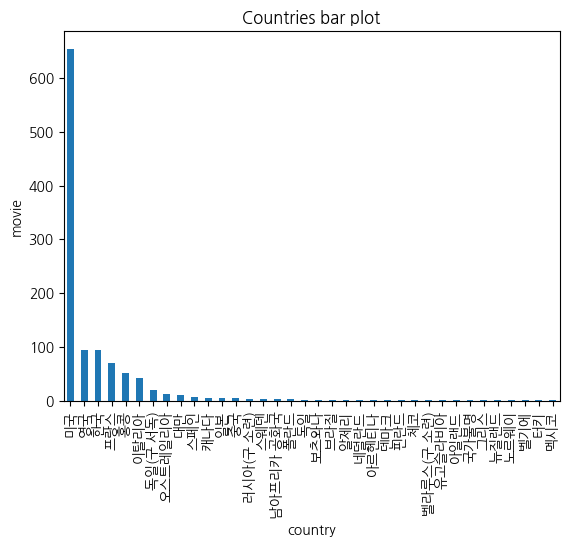

In [385]:
## countries bar plot
countries.head()
plt.title('Countries bar plot')
plt.xlabel('country')
plt.ylabel('movie')
countries['country'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Genres bar plot'}, xlabel='genre', ylabel='count'>

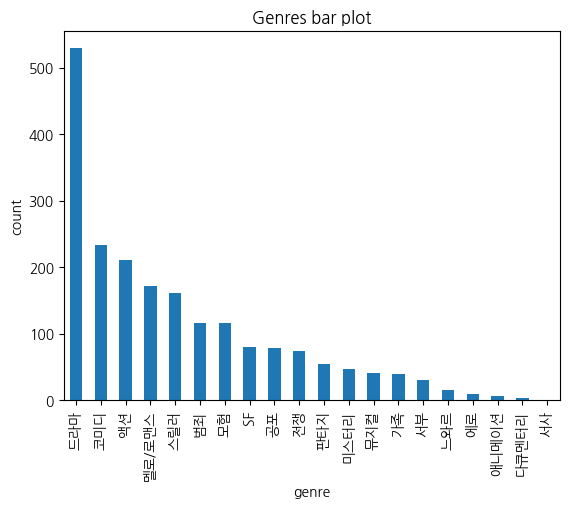

In [386]:
## genres bar plot
genres.head()
plt.title('Genres bar plot')
plt.xlabel('genres')
plt.ylabel('count')
genres['genre'].value_counts().plot(kind='bar')

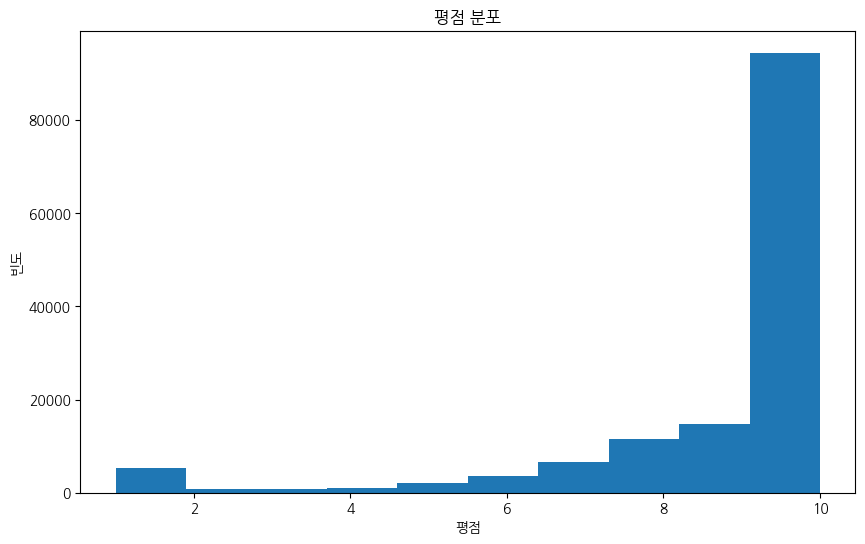

In [387]:
# 평점 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(rates['rate'])
plt.title('평점 분포')
plt.xlabel('평점')
plt.ylabel('빈도')
plt.show()


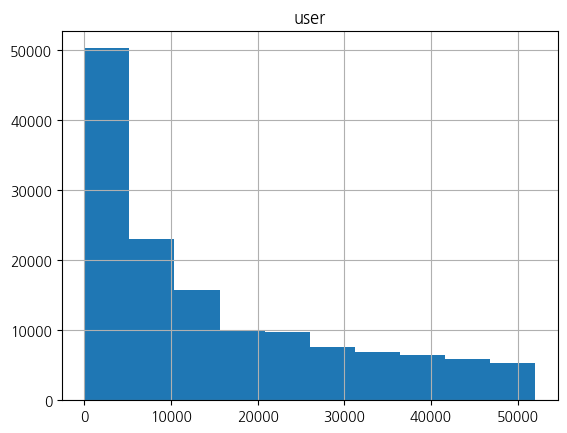

In [388]:
# draw as problem

## user rate, x-axis is user, y-axis is rate
plt.title('user')
plt.hist(rates['user'], bins=10)
plt.grid()
plt.show()

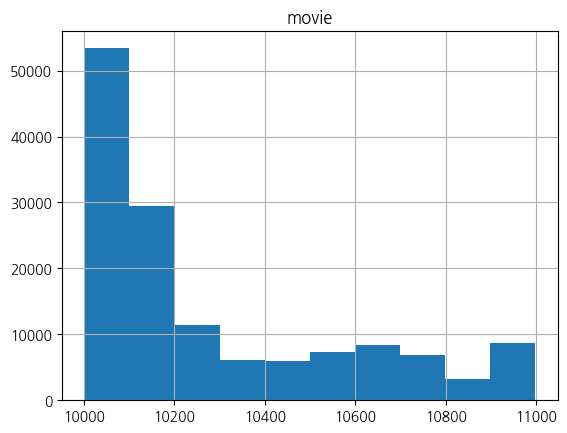

In [389]:
plt.title('movie')
plt.hist(rates['movie'], bins=10)
plt.grid()
plt.show()

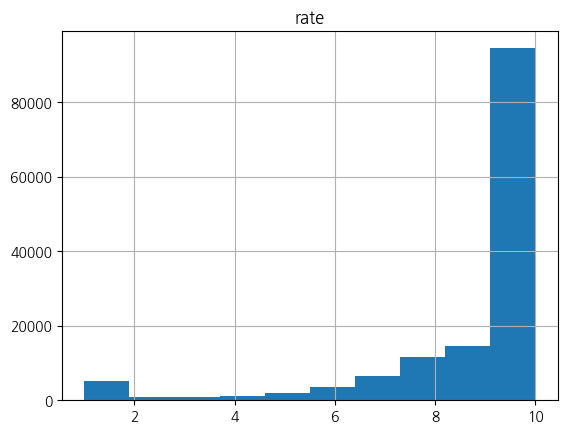

In [390]:
# rate
plt.title('rate')
plt.hist(rates['rate'], bins=10)
plt.grid()
plt.show()

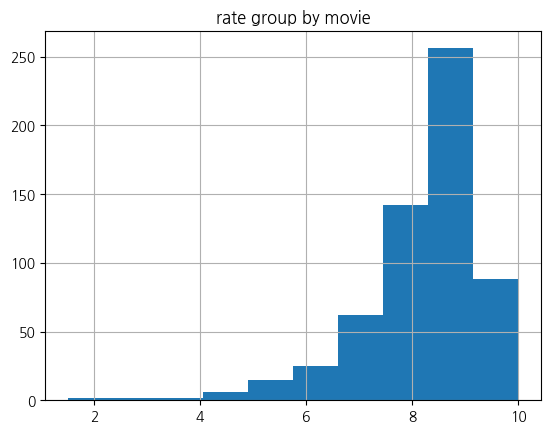

In [391]:
# rate group by movie
rate_group_by_movie = rates.groupby('movie').mean()
plt.title('rate group by movie')
plt.hist(rate_group_by_movie['rate'], bins=10)
plt.grid()
plt.show()

In [392]:
rates['user_count'] = rates.groupby('user')['user'].transform('count').reset_index(drop=True)
rates['user_count'].describe()

count    140710.000000
mean         26.428200
std          52.773473
min           1.000000
25%           1.000000
50%           6.000000
75%          25.000000
max         413.000000
Name: user_count, dtype: float64

lower_bound: -35.0, upper_bound: 61.0
rate over 3.5: 12.554900149243123%


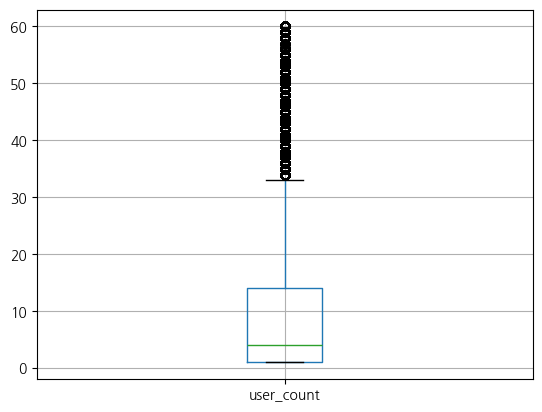

In [ ]:
# calculate ouliner using IQR
q1 = rates['user_count'].quantile(0.25)
q3 = rates['user_count'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'lower_bound: {lower_bound}, upper_bound: {upper_bound}')

# rate over upper_bound
print(f'rate over upper: {len(rates[rates["user_count"] > upper_bound]) / len(rates) * 100}%')

# drop user_count over upper_bound
rates = rates[rates['user_count'] < upper_bound]
rates.boxplot(column='user_count')
plt.show()



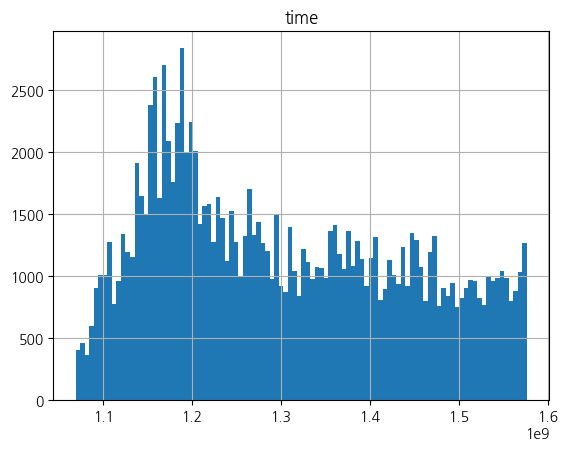

In [394]:
# time
plt.title('time')
plt.hist(rates['time'], bins=100)
plt.grid()
plt.show()



In [395]:
# 가장 많이 평가된 영화

## movie별로 평가된 횟수를 계산
rate_count = rates['movie'].value_counts().reset_index()
rate_count.head()


## 가장 평점이 높은 영화

rate_count.columns = ['movie', 'rate_count']
rate_count = rate_count.merge(movies, on='movie')
rate_count = rate_count.sort_values(by='rate_count', ascending=False)
rate_count.head()


,movie,rate_count,title,title_eng,year,grade
0,10200,6831,터미네이터 2:오리지널,"Terminator 2: Judgment Day , 1991",2019.0,15세 관람가
1,10048,6560,죽은 시인의 사회,"Dead Poets Society , 1989",2016.0,12세 관람가
2,10102,4111,사운드 오브 뮤직,"The Sound Of Music , 1965",2017.0,전체 관람가
3,10016,3738,나 홀로 집에,"Home Alone , 1990",1991.0,전체 관람가
4,10936,3366,가위손,"Edward Scissorhands , 1990",2014.0,15세 관람가


/tmp/ipykernel_105099/3697326529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rates['datetime'] = pd.to_datetime(rates['time'], unit='s')
/tmp/ipykernel_105099/3697326529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rates['year'] = rates['datetime'].dt.year


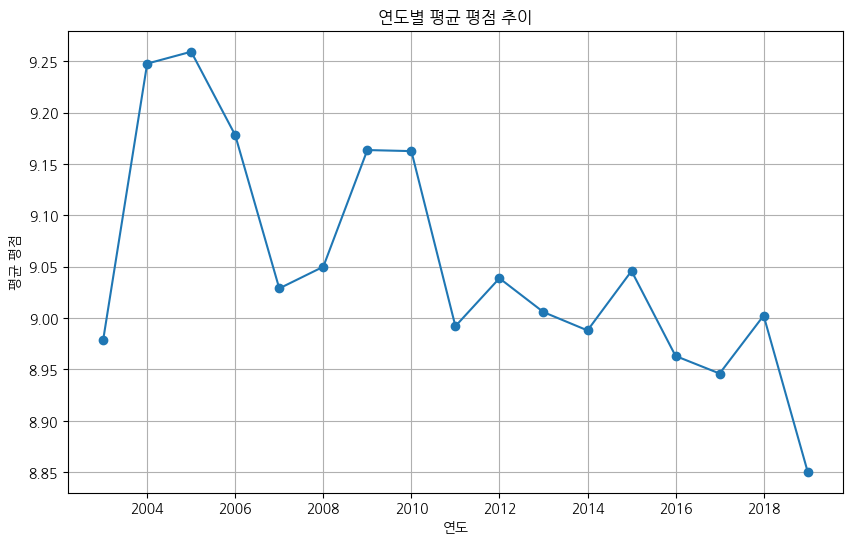

In [396]:

# 시간대별 평점 추이
rates['datetime'] = pd.to_datetime(rates['time'], unit='s')
rates['year'] = rates['datetime'].dt.year
yearly_avg = rates.groupby('year')['rate'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')
plt.title('연도별 평균 평점 추이')
plt.xlabel('연도')
plt.ylabel('평균 평점')
plt.grid(True)
plt.show()



# REF
https://cheris8.github.io/data%20analysis/DP-NA-Imputation/